# MiniProject 4

## Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## Data Set

<pre>
VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.
</pre>

## Setup Imports and Variables

In [134]:
import pandas as pd
import numpy as np
import pylab as plt

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10

## Explore the Data

Read the data:

In [135]:
df_train = pd.read_csv('../data/titanic/train.csv')


In [136]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [137]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


View the data types of each column:

In [138]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Type 'object' is a string for pandas, which poses problems with machine learning algorithms.  If we want to use these as features, we'll need to convert these to number representations.

Get some basic information on the DataFrame:

In [139]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Age, Cabin, and Embarked are missing values.  Cabin has too many missing values, whereas we might be able to infer values for Age and Embarked.

Generate various descriptive statistics on the DataFrame:

In [140]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Now that we have a general idea of the data set contents, we can dive deeper into each column.  We'll be doing exploratory data analysis and cleaning data to setup 'features' we'll be using in our machine learning algorithms.

Plot a few features to get a better idea of each:

Text(0.5, 1.0, 'Age Histogram')

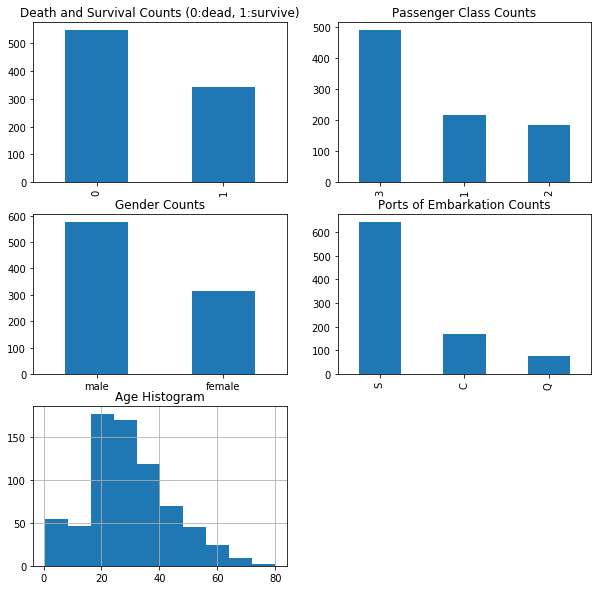

In [141]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 2)

# Plot death and survival counts
plt.subplot2grid(fig_dims, (0, 0))
df_train['Survived'].value_counts().plot(kind='bar', 
                                         title='Death and Survival Counts (0:dead, 1:survive)')

# Plot Pclass counts
plt.subplot2grid(fig_dims, (0, 1))
df_train['Pclass'].value_counts().plot(kind='bar', 
                                       title='Passenger Class Counts')

# Plot Sex counts
plt.subplot2grid(fig_dims, (1, 0))
df_train['Sex'].value_counts().plot(kind='bar', 
                                    title='Gender Counts')
plt.xticks(rotation=0)

# Plot Embarked counts
plt.subplot2grid(fig_dims, (1, 1))
df_train['Embarked'].value_counts().plot(kind='bar', 
                                         title='Ports of Embarkation Counts')

# Plot the Age histogram
plt.subplot2grid(fig_dims, (2, 0))
df_train['Age'].hist()
plt.title('Age Histogram')

Next we'll explore various features to view their impact on survival rates.

## Feature: Passenger Classes

From our exploratory data analysis in the previous section, we see there are three passenger classes: First, Second, and Third class.  We'll determine which proportion of passengers survived based on their passenger class.

Generate a cross tab of Pclass and Survived:

In [142]:
pclass_xt = pd.crosstab(df_train['Pclass'], df_train['Survived'])
pclass_xt

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Plot the cross tab:

Text(0, 0.5, 'Survival Rate')

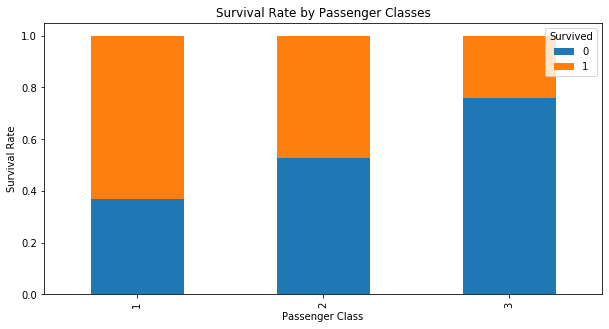

In [143]:
# Normalize the cross tab to sum to 1:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)

pclass_xt_pct.plot(kind='bar', 
                   stacked=True, 
                   title='Survival Rate by Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

We can see that passenger class seems to have a significant impact on whether a passenger survived.  Those in First Class the highest chance for survival.

## Feature: Sex

Gender might have also played a role in determining a passenger's survival rate.  We'll need to map Sex from a string to a number to prepare it for machine learning algorithms.

Generate a mapping of Sex from a string to a number representation:

In [144]:
sexes = sorted(df_train['Sex'].unique())
genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
genders_mapping

{'female': 0, 'male': 1}

Transform Sex from a string to a number representation:

In [145]:
df_train['Sex_Val'] = df_train['Sex'].map(genders_mapping).astype(int)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


Plot a normalized cross tab for Sex_Val and Survived:

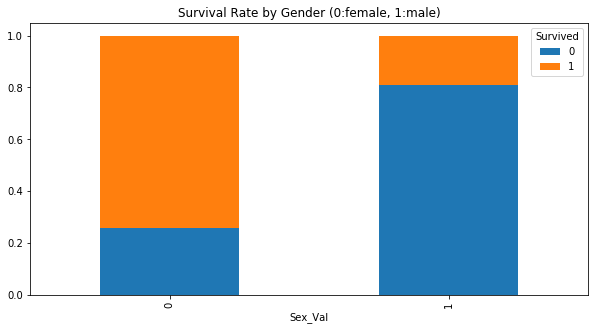

In [146]:
sex_val_xt = pd.crosstab(df_train['Sex_Val'], df_train['Survived'])
sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(1).astype(float), axis=0)
sex_val_xt_pct.plot(kind='bar', stacked=True, title='Survival Rate by Gender (0:female, 1:male)')

The majority of females survived, whereas the majority of males did not.

Next we'll determine whether we can gain any insights on survival rate by looking at **both Sex and Pclass.**

Count males and females in each Pclass:

In [147]:
# Get the unique values of Pclass:
passenger_classes = sorted(df_train['Pclass'].unique())

for p_class in passenger_classes:
    print('Male,   Pclass', p_class, ":",len(df_train[(df_train['Sex'] == 'male') & 
                             (df_train['Pclass'] == p_class)]))
    print('Female, Pclass', p_class, ":", len(df_train[(df_train['Sex'] == 'female') & 
                             (df_train['Pclass'] == p_class)]))

Male,   Pclass 1 : 122
Female, Pclass 1 : 94
Male,   Pclass 2 : 108
Female, Pclass 2 : 76
Male,   Pclass 3 : 347
Female, Pclass 3 : 144


Plot survival rate by Sex and Pclass:

Text(0, 0.5, 'Survival Rate')

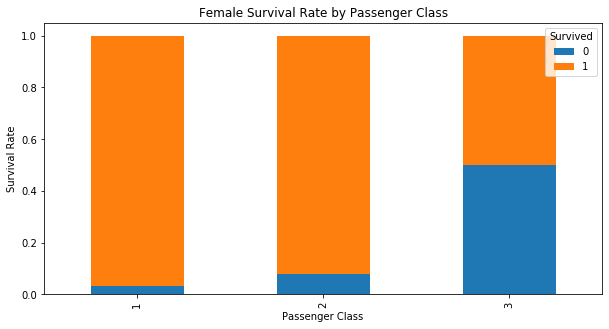

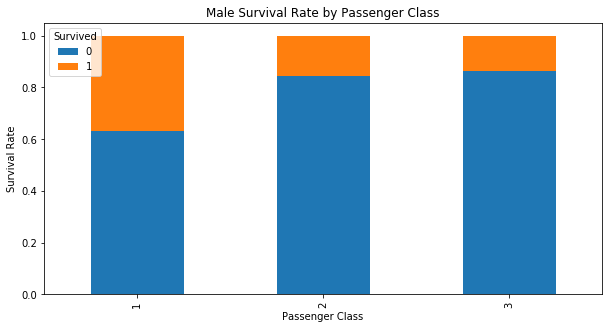

In [148]:
# Plot survival rate by Sex
females_df = df_train[df_train['Sex'] == 'female']
females_xt = pd.crosstab(females_df['Pclass'], df_train['Survived'])
females_xt_pct = females_xt.div(females_xt.sum(1).astype(float), axis=0)
females_xt_pct.plot(kind='bar', 
                    stacked=True, 
                    title='Female Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

# Plot survival rate by Pclass
males_df = df_train[df_train['Sex'] == 'male']
males_xt = pd.crosstab(males_df['Pclass'], df_train['Survived'])
males_xt_pct = males_xt.div(males_xt.sum(1).astype(float), axis=0)
males_xt_pct.plot(kind='bar', 
                  stacked=True, 
                  title='Male Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

The vast majority of females in First and Second class survived.  Males in First class had the highest chance for survival.

## Feature: Embarked

The Embarked column might be an important feature but it is missing a couple data points which might pose a problem for machine learning algorithms:

In [149]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0


Prepare to map Embarked from a string to a number representation:

In [150]:
# Get the unique values of Embarked
#dict(zip()) converts list to dictionary5
embarked_locs = (df_train['Embarked'].unique())
#embarked_locs = np.insert(embarked_locs, 0, np.nan)
embarked_locs_mapping = dict(zip(embarked_locs, 
                                 range(0, len(embarked_locs) + 1)))
embarked_locs_mapping

{'S': 0, 'C': 1, 'Q': 2, nan: 3}

Transform Embarked from a string to a number representation to prepare it for machine learning algorithms:

In [151]:
df_train['Embarked_Val'] = df_train['Embarked'] \
                               .map(embarked_locs_mapping) \
                               .astype(int)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0


Plot the histogram for Embarked_Val:

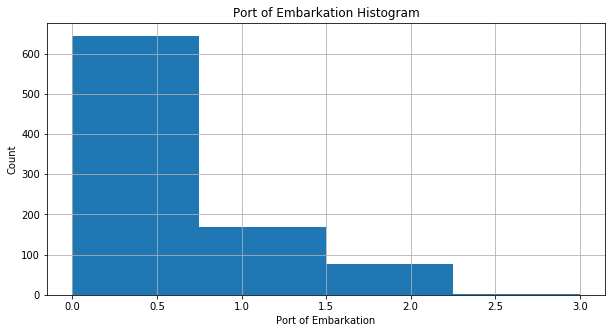

In [152]:
df_train['Embarked_Val'].hist(bins=len(embarked_locs), range=(0, 3))
plt.title('Port of Embarkation Histogram')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

Since the vast majority of passengers embarked in 'S': 0, we assign the missing values in Embarked to 'S': 

In [153]:
if len(df_train[df_train['Embarked'].isnull()]) > 0:
    df_train.replace({'Embarked_Val' : 
                   { embarked_locs_mapping[np.nan] : embarked_locs_mapping['S'] 
                   }
               }, 
               inplace=True)

Verify we do not have any more NaNs for Embarked_Val:

In [154]:
embarked_locs = sorted(df_train['Embarked_Val'].unique())
embarked_locs

[0, 1, 2]

Plot a normalized cross tab for Embarked_Val and Survived:

Text(0, 0.5, 'Survival Rate')

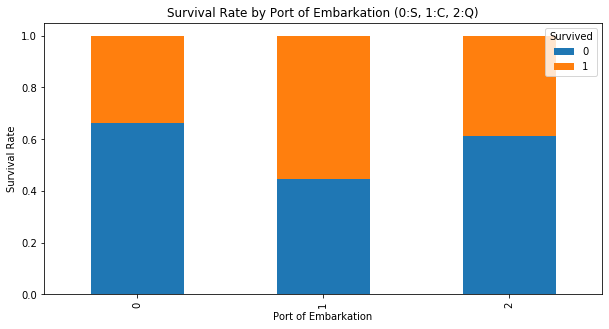

In [155]:
embarked_val_xt = pd.crosstab(df_train['Embarked_Val'], df_train['Survived'])
embarked_val_xt_pct = \
    embarked_val_xt.div(embarked_val_xt.sum(1).astype(float), axis=0)
embarked_val_xt_pct.plot(kind='bar', stacked=True)
plt.title('Survival Rate by Port of Embarkation (0:S, 1:C, 2:Q)')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')

It appears those that embarked in location 'C': 1 had the highest rate of survival. 

Leaving Embarked as integers implies ordering in the values, which does not exist.  Another way to represent Embarked without ordering is to create dummy variables (Embarked_Val_0, Embarked_Val_1, Embarked_Val_2):

In [156]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['Embarked_Val'], prefix='Embarked_Val')], axis=1)

In [157]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Val,Embarked_Val_0,Embarked_Val_1,Embarked_Val_2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1,0,0


## Feature: Age

The Age column seems like an important feature--unfortunately it is missing many values.  We'll need to fill in the missing values like we did with Embarked.

Filter to view missing Age values:

In [158]:
df_train[df_train['Age'].isnull()][['Sex', 'Pclass', 'Age']].head()

,Sex,Pclass,Age
5,male,3,NaN
17,male,2,NaN
19,female,3,NaN
26,male,3,NaN
28,female,3,NaN


Determine the Age typical for each passenger class by Sex_Val.  We'll use the median instead of the mean because the Age histogram seems to be right skewed.

In [159]:
# To keep Age in tact, make a copy of it called AgeFill 
# that we will use to fill in the missing ages:
df_train['AgeFill'] = df_train['Age']

# Populate AgeFill
df_train['AgeFill'] = df_train['AgeFill'] \
                        .groupby([df_train['Sex_Val'], df_train['Pclass']]) \
                        .apply(lambda x: x.fillna(x.median()))

Ensure AgeFill does not contain any missing values:

In [160]:
print(len(df_train[df_train['AgeFill'].isnull()]))
df_train[df_train['Age'].isnull()][['Sex', 'Pclass', 'Age','AgeFill']].head()

0


,Sex,Pclass,Age,AgeFill
5,male,3,NaN,25.0
17,male,2,NaN,30.0
19,female,3,NaN,21.5
26,male,3,NaN,25.0
28,female,3,NaN,21.5


Plot a normalized cross tab for AgeFill and Survived:

Text(0, 0.5, 'Count')

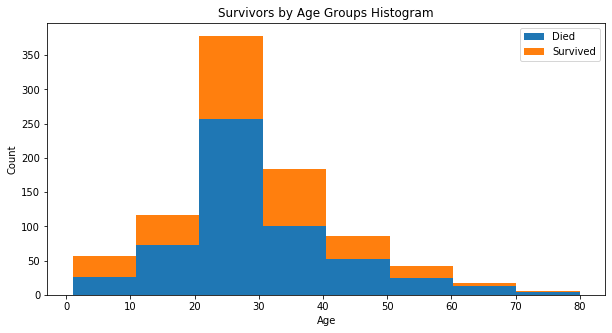

In [161]:
# Histogram of AgeFill segmented by Survived
df1 = df_train[df_train['Survived'] == 0]['AgeFill']
df2 = df_train[df_train['Survived'] == 1]['AgeFill']

max_age = max(df_train['AgeFill'])
plt.hist([df1, df2], 
             bins=int(max_age / bin_size), 
             range=(1, max_age),
             stacked=True)
plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Age Groups Histogram')
plt.xlabel('Age')
plt.ylabel('Count')



Unfortunately, the graphs above do not seem to clearly show any insights.  We'll keep digging further.

Plot AgeFill density by Pclass:

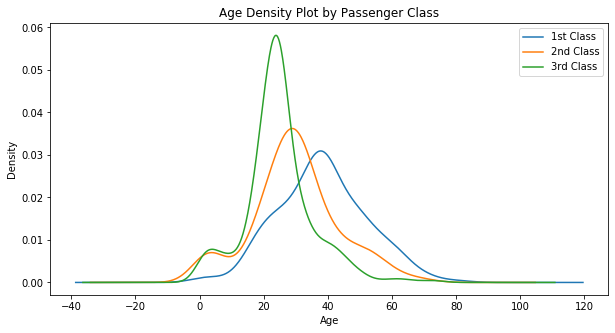

In [162]:
for pclass in passenger_classes:
    df_train.AgeFill[df_train.Pclass == pclass].plot(kind='kde')
plt.title('Age Density Plot by Passenger Class')
plt.xlabel('Age')
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')

When looking at AgeFill density by Pclass, we see the first class passengers were generally older then second class passengers, which in turn were older than third class passengers.  We've determined that first class passengers had a higher survival rate than second class passengers, which in turn had a higher survival rate than third class passengers.

[0, 80.0, 0, 130]

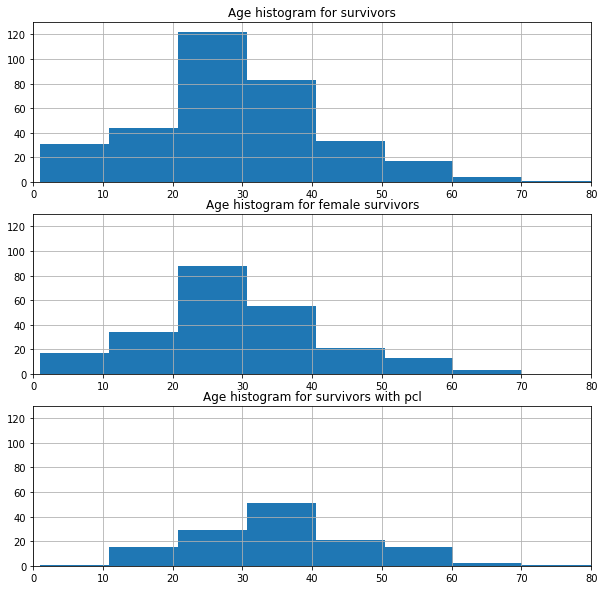

In [163]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 1)

# Plot the AgeFill histogram for Survivors
plt.subplot2grid(fig_dims, (0, 0))
survived_df = df_train[df_train['Survived'] == 1]
survived_df['AgeFill'].hist(bins=int(max_age / bin_size), range=(1, max_age))
plt.title("Age histogram for survivors")
plt.axis([0,max_age,0,130])

# Plot the AgeFill histogram for Females
plt.subplot2grid(fig_dims, (1, 0))
females_df = df_train[(df_train['Sex_Val'] == 0) & (df_train['Survived'] == 1)]
females_df['AgeFill'].hist(bins=int(max_age / bin_size), range=(1, max_age))
plt.title("Age histogram for female survivors")
plt.axis([0,max_age,0,130])

# Plot the AgeFill histogram for first class passengers
plt.subplot2grid(fig_dims, (2, 0))
class1_df = df_train[(df_train['Pclass'] == 1) & (df_train['Survived'] == 1)]
class1_df['AgeFill'].hist(bins=int(max_age / bin_size), range=(1, max_age))
plt.title("Age histogram for survivors with pcl")
plt.axis([0,max_age,0,130])

In the first graph, we see that most survivors come from the 20's to 30's age ranges and might be explained by the following two graphs.  The second graph shows most females are within their 20's.  The third graph shows most first class passengers are within their 30's.

## Feature: Family Size

Feature enginering involves creating new features or modifying existing features which might be advantageous to a machine learning algorithm.

Define a new feature FamilySize that is the sum of Parch (number of parents or children on board) and SibSp (number of siblings or spouses):

In [164]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Val,Embarked_Val_0,Embarked_Val_1,Embarked_Val_2,AgeFill,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1,0,0,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,1,0,38.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,0,26.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,0,0,35.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1,0,0,35.0,0


Plot a histogram of FamilySize:

Text(0.5, 1.0, 'Family Size Histogram')

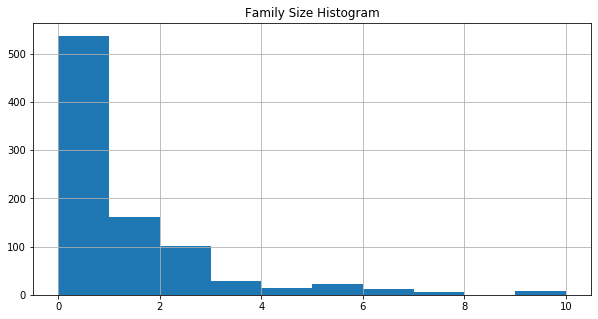

In [165]:
df_train['FamilySize'].hist()
plt.title('Family Size Histogram')

Plot a histogram of AgeFill segmented by Survived:

Text(0.5, 1.0, 'Survivors by Family Size')

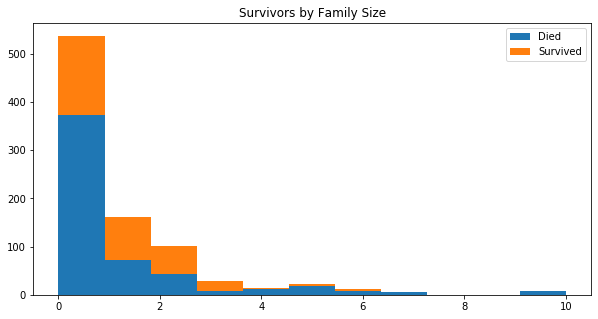

In [166]:
# Get the unique values of Embarked and its maximum
family_sizes = sorted(df_train['FamilySize'].unique())
family_size_max = max(family_sizes)

df1 = df_train[df_train['Survived'] == 0]['FamilySize']
df2 = df_train[df_train['Survived'] == 1]['FamilySize']
plt.hist([df1, df2], 
         bins=family_size_max + 1, 
         range=(0, family_size_max), 
         stacked=True)
plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Family Size')


Based on the histograms, it is not immediately obvious what impact FamilySize has on survival.  The machine learning algorithms might benefit from this feature.

Additional features we might want to engineer might be related to the Name column, for example honorrary or pedestrian titles might give clues and better predictive power for a male's survival.

## Feature Engineering 

Many machine learning algorithms do not work on strings and they usually require the data to be in an array, not a DataFrame.

Show only the columns of type 'object' (strings):

In [167]:
df_train.dtypes[df_train.dtypes.map(lambda x: x == 'object')]

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

Drop the columns we won't use:

In [168]:
df_train = df_train.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], 
                         axis=1)

Drop the following columns:
* The Age column since we will be using the AgeFill column instead.
* The SibSp and Parch columns since we will be using FamilySize instead.
* The PassengerId column since it won't be used as a feature.
* The Embarked_Val as we decided to use dummy variables instead.

In [169]:
df_train = df_train.drop(['Age', 'SibSp', 'Parch', 'PassengerId', 'Embarked_Val'], axis=1)
df_train.dtypes

Survived            int64
Pclass              int64
Fare              float64
Sex_Val             int64
Embarked_Val_0      uint8
Embarked_Val_1      uint8
Embarked_Val_2      uint8
AgeFill           float64
FamilySize          int64
dtype: object

Convert the DataFrame to a numpy array:

## Confusion Matrix

In [186]:
#final dataframe
df_final = df_train[df_train.columns[1:9]]
df_final.head()
df_final.columns.values


array(['Pclass', 'Fare', 'Sex_Val', 'Embarked_Val_0', 'Embarked_Val_1',
       'Embarked_Val_2', 'AgeFill', 'FamilySize'], dtype=object)

In [300]:
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)

# creating a list of only numerical values
numerical = [u'Pclass', u'Fare', u'Sex_Val', u'Embarked_Val_0', u'Embarked_Val_1',
       u'Embarked_Val_2', u'AgeFill', u'FamilySize']
data = [
    go.Heatmap(
        z= df_final[numerical].astype(float).corr().values, # Generating the Pearson correlation
        x= df_final[numerical].columns.values,
        y= df_final[numerical].columns.values,
        colorscale='Viridis',
        reversescale = False,
#         text = True ,
        opacity = 1.0
        
    )
]


layout = go.Layout(
    title='Pearson Correlation of numerical features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,
    
)


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

[Text(0.5, 1.0, 'Embarkation Port against Fare')]

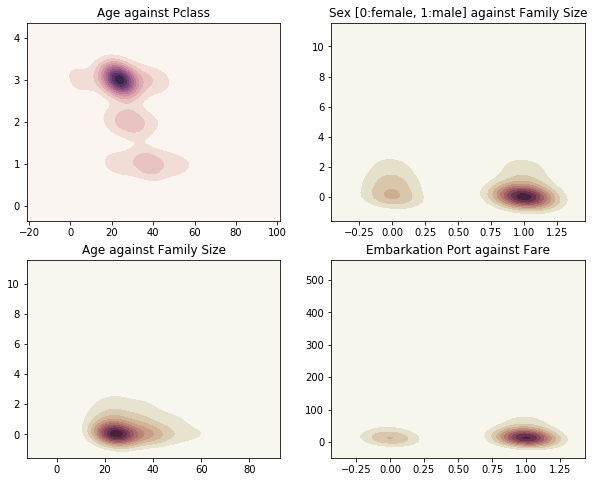

In [308]:
import seaborn as sns
# Plotting the KDEplots
f, axes = plt.subplots(2, 2, figsize=(10, 8), 
                       sharex=False, sharey=False)

# Defining our colormap scheme
s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

# Generate and plot
x = df_final["AgeFill"].values
y = df_final["Pclass"].values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0,0])
axes[0,0].set( title = 'Age against Pclass')

cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
# Generate and plot
x = df_final["Sex_Val"].values
y = df_final["FamilySize"].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set( title = 'Sex [0:female, 1:male] against Family Size')

cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
# Generate and plot
x = df_final["AgeFill"].values
y = df_final["FamilySize"].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[1,0])
axes[1,0].set( title = 'Age against Family Size')


cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
# Generate and plot
x = df_final["Embarked_Val_0"].values
y = df_final["Fare"].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[1,1])
axes[1,1].set( title = 'Embarkation Port against Fare')


In [281]:
#Target variable
# Define a dictionary for the target mapping
data = [go.Bar(
            x=df_train['Survived'].value_counts().index.values,
            y=df_train['Survived'].value_counts().values
    )]

py.iplot(data, filename='basic-bar')

In [85]:
df_train.head()
train_data = df_train.values
train_data

array([[ 0.    ,  3.    ,  7.25  , ...,  0.    , 22.    ,  1.    ],
       [ 1.    ,  1.    , 71.2833, ...,  0.    , 38.    ,  1.    ],
       [ 1.    ,  3.    ,  7.925 , ...,  0.    , 26.    ,  0.    ],
       ...,
       [ 0.    ,  3.    , 23.45  , ...,  0.    , 21.5   ,  3.    ],
       [ 1.    ,  1.    , 30.    , ...,  0.    , 26.    ,  0.    ],
       [ 0.    ,  3.    ,  7.75  , ...,  1.    , 32.    ,  0.    ]])

## Training Models: Split and Test Data, Kfolds

We'll split our training data, 80% will go to "train" and 20% will go to "test":

In [40]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Training data features, skip the first column 'Survived'
train_features = train_data[:, 1:]

# 'Survived' column values
train_target = train_data[:, 0]

# Split 80-20 train vs test data
train_x, test_x, train_y, test_y = train_test_split(train_features, 
                                                    train_target, 
                                                    test_size=0.20, 
                                                    random_state=0)

print (train_features.shape, train_target.shape)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)


(891, 8) (891,)
(712, 8) (712,)
(179, 8) (179,)


In [398]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

kf = KFold(n_splits=5, shuffle=True)

for train, test in kf.split(train_features, train_target):
    #train for k-1 folds
    X_train = train_features[train]
    X_test = train_features[test]
    Y_train = train_target[train]
    Y_test = train_target[test]

Since we have already noted some imbalance in the survived vs non-survived values within the target variable, let us implement the SMOTE method in the dealing with this skewed value via the imblearn Python package.

In [310]:
oversampler=SMOTE(random_state=0)
trainx, trainy = oversampler.fit_sample(train_x, train_y)

## Logistic Regression Model

Create the logistic regression model:

In [366]:
from sklearn.linear_model import LogisticRegression

## Type your own code
# instantiate our model and fit the model with the training data
# LogisticRegression(solver = 'liblinear')

clf_lr = LogisticRegression (solver = 'liblinear')
clf_lr.fit(train_x, train_y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Logistic regression model gives predicted probability and according to the probability, it decides the result in binary. Now, let's predict the result using train data.

In [367]:
# '.predict_proba' shows the predicted probability
# in this case, first column is probability to survive and second col is probability to dead
# '.predict' provides classification result

ypred_prob = clf_lr.predict_proba(train_x)
ypred = clf_lr.predict(train_x)

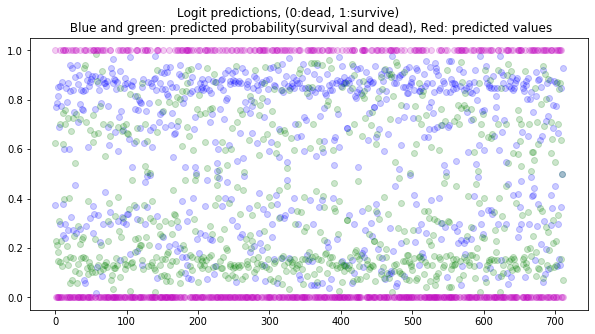

In [368]:
# plot the predicted value
x_idx = np.arange(train_x.shape[0])

plt.plot(x_idx, ypred_prob[:,0], 'bo', x_idx, ypred_prob[:,1], 'go',x_idx, ypred, 'mo', alpha=.2);
plt.title('Logit predictions, (0:dead, 1:survive) \
          \n Blue and green: predicted probability(survival and dead), Red: predicted values');

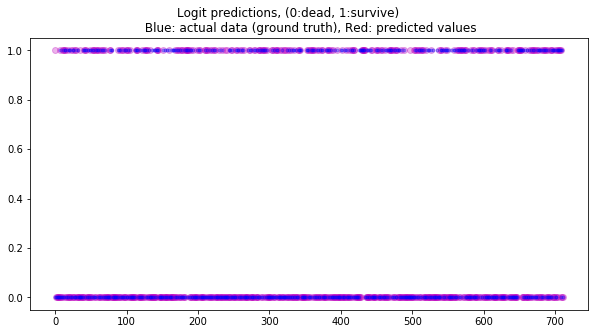

In [369]:
# plot the predicted value
x_idx = np.arange(train_x.shape[0])

plt.plot(x_idx, ypred, 'mo', x_idx, train_y, 'b.',alpha=.3);
plt.title('Logit predictions, (0:dead, 1:survive) \
          \n Blue: actual data (ground truth), Red: predicted values');

## Logistic Regression Model: Evaluate Model 

Use the **test data** to predict, and evaluate the model with 

1) Accuracy, 2) Precision, 3) Recall, 4) F1 score

### Confusion Matrix

    |                | condition True | condition false |
    |----------------|----------------|-----------------|
    |prediction true | True Positive  | False positive  |
    |Prediction False| False Negative | True Negative   |

In [370]:
## type your own code
# generate prediction from fitted logistic regression model with test data
# then makes the confusion matrix using 'metrics.confusion_matrix(true, predicted)' function
# provides confusion matrix with actual data and predicted data.

predicted_y = clf_lr.predict(test_x)
confusion_matrix = metrics.confusion_matrix(test_y, predicted_y)


In [371]:
print ("Confusion Matrix ", confusion_matrix)

print ("          Predicted")
print ("         |  0  |  1  |")
print ("         |-----|-----|")
print ("       0 | %3d | %3d |" % (confusion_matrix[0, 0],
                                   confusion_matrix[0, 1]))
print ("Actual   |-----|-----|")
print ("       1 | %3d | %3d |" % (confusion_matrix[1, 0],
                                   confusion_matrix[1, 1]))
print ("         |-----|-----|")

Confusion Matrix  [[95 15]
 [20 49]]
          Predicted
         |  0  |  1  |
         |-----|-----|
       0 |  95 |  15 |
Actual   |-----|-----|
       1 |  20 |  49 |
         |-----|-----|


### 1) Accuracy

$$Accuracy=\frac{TP+TN}{All}$$

In [372]:
# Mean accuracy on the given data and labels
accuracy = metrics.accuracy_score(test_y, predicted_y)

In [373]:
print("Logistic Regression Model")
print("-------------------------")
print("Mean accuracy with test data:", accuracy)
print("Mean accuracy with test data:", accuracy_2)

Logistic Regression Model
-------------------------
Mean accuracy with test data: 0.8044692737430168
Mean accuracy with test data: 0.8044692737430168


### 2) Precision, 3) Recall, 4) F1 score

$$Precision = \frac{TP}{TP + FP}$$ 

$$Recall = \frac{TP}{TP + FN}$$ 

$$F1 = \frac{2TP}{2TP + FP + FN}$$ 

In [374]:
from sklearn.metrics import classification_report

##Type your own code
# 'classification_report(true, predicted, target_names)' gives you classification summary
# including precision, recall, and f1-score
# use 'traget_names=['Not Survived', 'Survived']'

summary = classification_report(test_y, predicted_y, target_names=['Not Survived', 'Survived'])


In [375]:
print(summary)

              precision    recall  f1-score   support

Not Survived       0.83      0.86      0.84       110
    Survived       0.77      0.71      0.74        69

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



## Support Vector Machine

Create the logistic regression model:

In [376]:
from sklearn import svm

## Type your own code
# instantiate our model and fit the model with the training data
# svm.SVC(gamma = 'scale', kernel = 'rbf')

clf_svm = svm.SVC(gamma = 'scale', kernel = 'rbf')
clf_svm.fit(train_x, train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Logistic regression model gives predicted probability and according to the probability, it decides the result in binary. Now, let's predict the result using train data.

In [377]:
## Type your own code
# generate predictions from our fitted svm model with train data
# '.predict' provides classification result

ypred = clf_svm.predict(train_x)



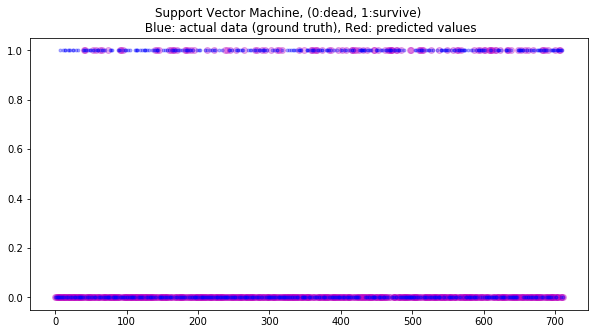

In [378]:
# plot the predicted value
x_idx = np.arange(train_x.shape[0])

plt.plot(x_idx, ypred, 'mo', x_idx, train_y, 'b.',alpha=.3);
plt.title('Support Vector Machine, (0:dead, 1:survive) \
          \n Blue: actual data (ground truth), Red: predicted values');

## Support Vector Machine: Evaluate Model 

Use the **test data** to predict, and evaluate the model with 

1) Accuracy, 2) Precision, 3) Recall, 4) F1 score

### Confusion Matrix

    |                | condition True | condition false |
    |----------------|----------------|-----------------|
    |prediction true | True Positive  | False positive  |
    |Prediction False| False Negative | True Negative   |

In [380]:
## type your own code
# 'metrics.confusion_matrix(true, predicted)' 
# provides confusion matrix with actual data and predicted data.
predict_y = clf_svm.predict(test_x)
confusion_matrix = metrics.confusion_matrix(test_y, predict_y)


In [381]:
print ("Confusion Matrix ", confusion_matrix)

print ("          Predicted")
print ("         |  0  |  1  |")
print ("         |-----|-----|")
print ("       0 | %3d | %3d |" % (confusion_matrix[0, 0],
                                   confusion_matrix[0, 1]))
print ("Actual   |-----|-----|")
print ("       1 | %3d | %3d |" % (confusion_matrix[1, 0],
                                   confusion_matrix[1, 1]))
print ("         |-----|-----|")

Confusion Matrix  [[104   6]
 [ 43  26]]
          Predicted
         |  0  |  1  |
         |-----|-----|
       0 | 104 |   6 |
Actual   |-----|-----|
       1 |  43 |  26 |
         |-----|-----|


### 1) Accuracy

$$Accuracy=\frac{TP+TN}{All}$$

In [382]:
# Mean accuracy on the given data and labels
## Type your own code ##
# scoring the support vector machine model with test data
# '.score' gives the mean accuracy with given data set
# Or you can calculate accuracy with confusion matrix obtained above

accuracy = metrics.accuracy_score(test_y, predict_y)


In [383]:
print("Support Vector Machine")
print("-------------------------")
print("Mean accuracy with test data:", accuracy)

Support Vector Machine
-------------------------
Mean accuracy with test data: 0.7262569832402235


### 2) Precision, 3) Recall, 4) F1 score

$$Precision = \frac{TP}{TP + FP}$$ 

$$Recall = \frac{TP}{TP + FN}$$ 

$$F1 = \frac{2TP}{2TP + FP + FN}$$ 

In [384]:
from sklearn.metrics import classification_report

##Type your own code
# 'classification_report(true, predicted, target_names)' gives you classification summary
# including precision, recall, and f1-score
# use 'traget_names=['Not Survived', 'Survived']'
summary = classification_report(test_y, predict_y, target_names=['Not Survived', 'Survived'])


In [385]:
print(summary)

              precision    recall  f1-score   support

Not Survived       0.71      0.95      0.81       110
    Survived       0.81      0.38      0.51        69

    accuracy                           0.73       179
   macro avg       0.76      0.66      0.66       179
weighted avg       0.75      0.73      0.70       179



## Linear SVC

In [399]:
from sklearn.svm import LinearSVC

lin_clf = LinearSVC(C=1000, max_iter=1000)
lin_clf.fit(X_train, Y_train)
ypred2 = lin_clf.predict(X_test)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [386]:
accuracy = metrics.accuracy_score(test_y, ypred2)
print("Support Vector Machine")
print("-------------------------")
print("Mean accuracy with test data:", accuracy)

Support Vector Machine
-------------------------
Mean accuracy with test data: 0.7430167597765364


In [400]:
summary = classification_report(Y_test, ypred2, target_names=['Not Survived', 'Survived'])
print(summary)

              precision    recall  f1-score   support

Not Survived       0.75      0.94      0.84       106
    Survived       0.87      0.54      0.67        72

    accuracy                           0.78       178
   macro avg       0.81      0.74      0.75       178
weighted avg       0.80      0.78      0.77       178



## Decision Trees
Decision trees tend to overfit on data with a large number of features. Getting the right ratio of samples to number of features is important, since a tree with few samples in high dimensional space is very likely to overfit.

### Model 1

In [423]:
#model 1
#decision tree classifier
#the danger of classifying data with decision trees is overfitting
#baseline model: min_samples_leaf=5 
#A small number of leaves usually means the tree will overfit, whereas a large number will prevent the tree from learning the data. 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=3, min_samples_split=2, min_samples_leaf=5, random_state=0)
clf_tree.fit(trainx, trainy)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [424]:
ypred_tree = clf_tree.predict(test_x)

In [513]:
accuracy = metrics.accuracy_score(test_y, ypred_tree)
print("")
print("-------------------------")
print("Mean accuracy with test data:", accuracy)


-------------------------
Mean accuracy with test data: 0.8268156424581006


In [426]:
confusion_matrix = metrics.confusion_matrix(test_y, predict_y)
print ("Confusion Matrix ", confusion_matrix)

print ("          Predicted")
print ("         |  0  |  1  |")
print ("         |-----|-----|")
print ("       0 | %3d | %3d |" % (confusion_matrix[0, 0],
                                   confusion_matrix[0, 1]))
print ("Actual   |-----|-----|")
print ("       1 | %3d | %3d |" % (confusion_matrix[1, 0],
                                   confusion_matrix[1, 1]))
print ("         |-----|-----|")

Confusion Matrix  [[104   6]
 [ 43  26]]
          Predicted
         |  0  |  1  |
         |-----|-----|
       0 | 104 |   6 |
Actual   |-----|-----|
       1 |  43 |  26 |
         |-----|-----|


In [427]:
from sklearn.metrics import classification_report
summary = classification_report(test_y, ypred_tree, target_names=['Not Survived', 'Survived'])
print(summary)

              precision    recall  f1-score   support

Not Survived       0.85      0.87      0.86       110
    Survived       0.79      0.75      0.77        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



In [487]:
#post-pruning
from sklearn.tree._tree import TREE_LEAF

def prune_index(inner_tree, index, threshold):
    if inner_tree.value[index].min() < threshold:
        # turn node into a leaf by "unlinking" its children
        inner_tree.children_left[index] = TREE_LEAF
        inner_tree.children_right[index] = TREE_LEAF
    # if there are shildren, visit them as well
    if inner_tree.children_left[index] != TREE_LEAF:
        prune_index(inner_tree, inner_tree.children_left[index], threshold)
        prune_index(inner_tree, inner_tree.children_right[index], threshold)
        
print(sum(clf_tree.tree_.children_left < 0))
# start pruning from the root
prune_index(clf_tree.tree_, 0, 5)
print(sum(clf_tree.tree_.children_left < 0))

8
8


In [489]:
#visualization
import graphviz 
dot_data = tree.export_graphviz(clf_tree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("tree") 

'tree.pdf'

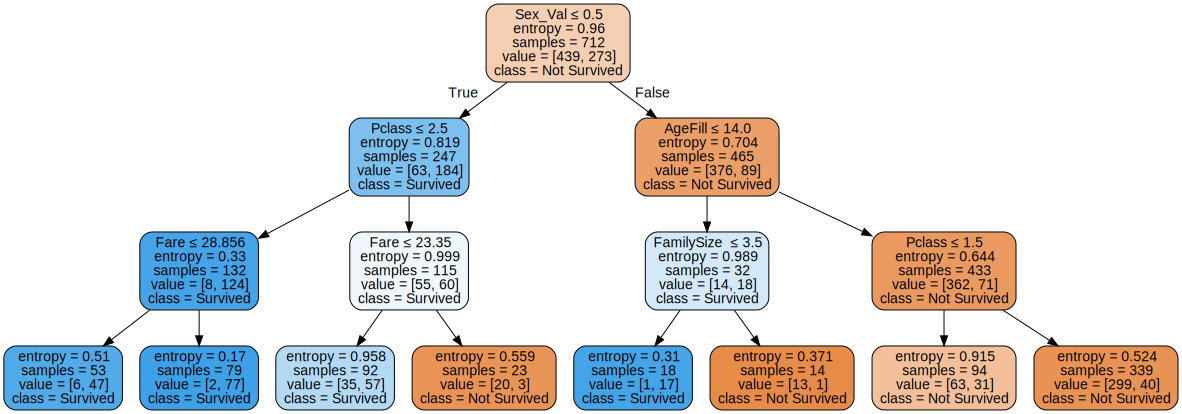

In [490]:
dot_data = tree.export_graphviz(clf_tree, out_file=None, 
                      feature_names=['Pclass', 'Fare', 'Sex_Val', 'Embarked_Val_0', 'Embarked_Val_1', 'Embarked_Val_', 'AgeFill', 'FamilySize '],  
                      class_names = ['Not Survived', 'Survived'],
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [432]:
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import re

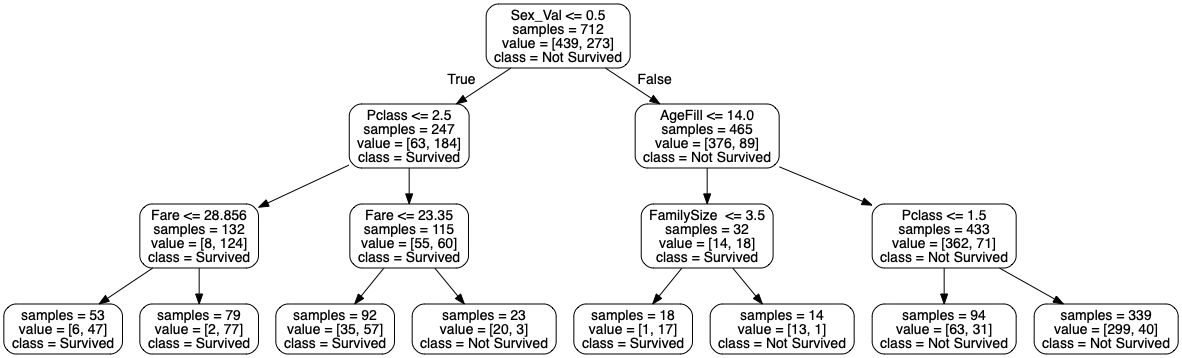

In [433]:
# Export our trained model as a .dot file
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(clf_tree,
                              out_file=f,
                              max_depth = 4,
                              impurity = False,
                              feature_names = ['Pclass', 'Fare', 'Sex_Val', 'Embarked_Val_0', 'Embarked_Val_1', 'Embarked_Val_', 'AgeFill', 'FamilySize '],
                              class_names = ['Not Survived', 'Survived'],
                              rounded = True
                              )
        
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

# Annotating chart with PIL
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png", height=2000, width=1900)

## Decision Tree Model 2

In [532]:
#model 2
clf_tree2 = tree.DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=4, min_samples_split=2, min_samples_leaf=10, random_state=0)
#smote train dataset
clf_tree2.fit(trainx, trainy)
ypred_tree2 = clf_tree2.predict(test_x)
summary = classification_report(test_y, ypred_tree2, target_names=['Not Survived', 'Survived'])
print(summary)

#post pruning
#not sure about it
print(sum(clf_tree2.tree_.children_left < 0))
prune_index(clf_tree2.tree_, 0, 5)
print(sum(clf_tree2.tree_.children_left < 0))

              precision    recall  f1-score   support

Not Survived       0.85      0.89      0.87       110
    Survived       0.81      0.75      0.78        69

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179

15
None
18


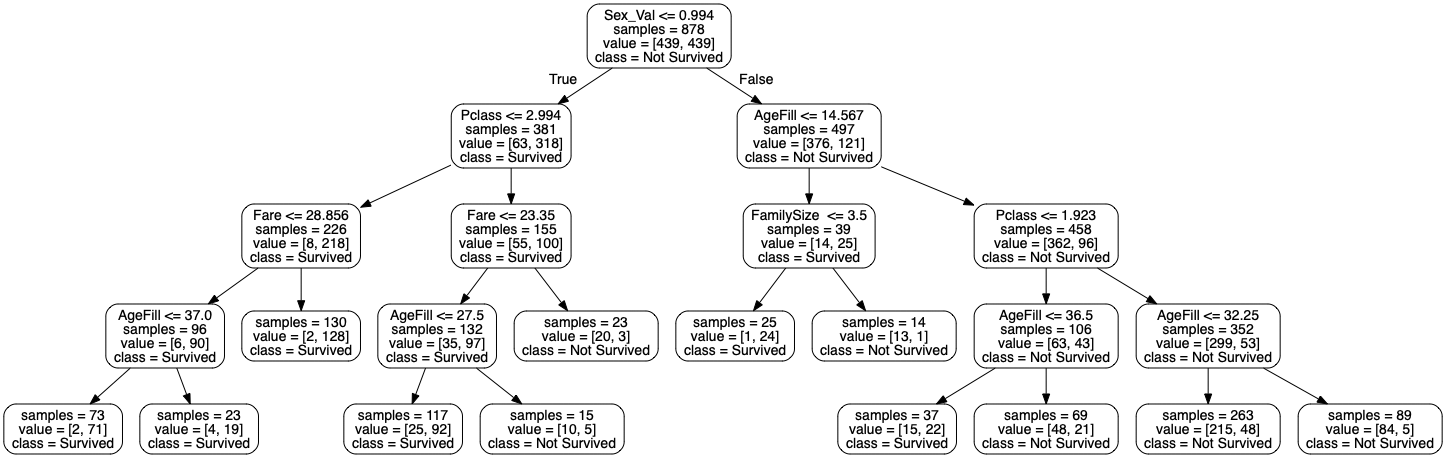

In [533]:
# Export our trained model as a .dot file
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(clf_tree2,
                              out_file=f,
                              max_depth = 4,
                              impurity = False,
                              feature_names = ['Pclass', 'Fare', 'Sex_Val', 'Embarked_Val_0', 'Embarked_Val_1', 'Embarked_Val_', 'AgeFill', 'FamilySize '],
                              class_names = ['Not Survived', 'Survived'],
                              rounded = True
                              )
        
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

# Annotating chart with PIL
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png", height=2000, width=1900)

## Decision Tree Model 3

In [497]:
clf_tree3 = tree.DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=8, min_samples_split=2, min_samples_leaf=10, random_state=0)
clf_tree3.fit(train_x, train_y)
ypred_tree3 = clf_tree3.predict(test_x)
summary = classification_report(test_y, ypred_tree3, target_names=['Not Survived', 'Survived'])
print(summary)


              precision    recall  f1-score   support

Not Survived       0.83      0.94      0.88       110
    Survived       0.87      0.70      0.77        69

    accuracy                           0.84       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.85      0.84      0.84       179



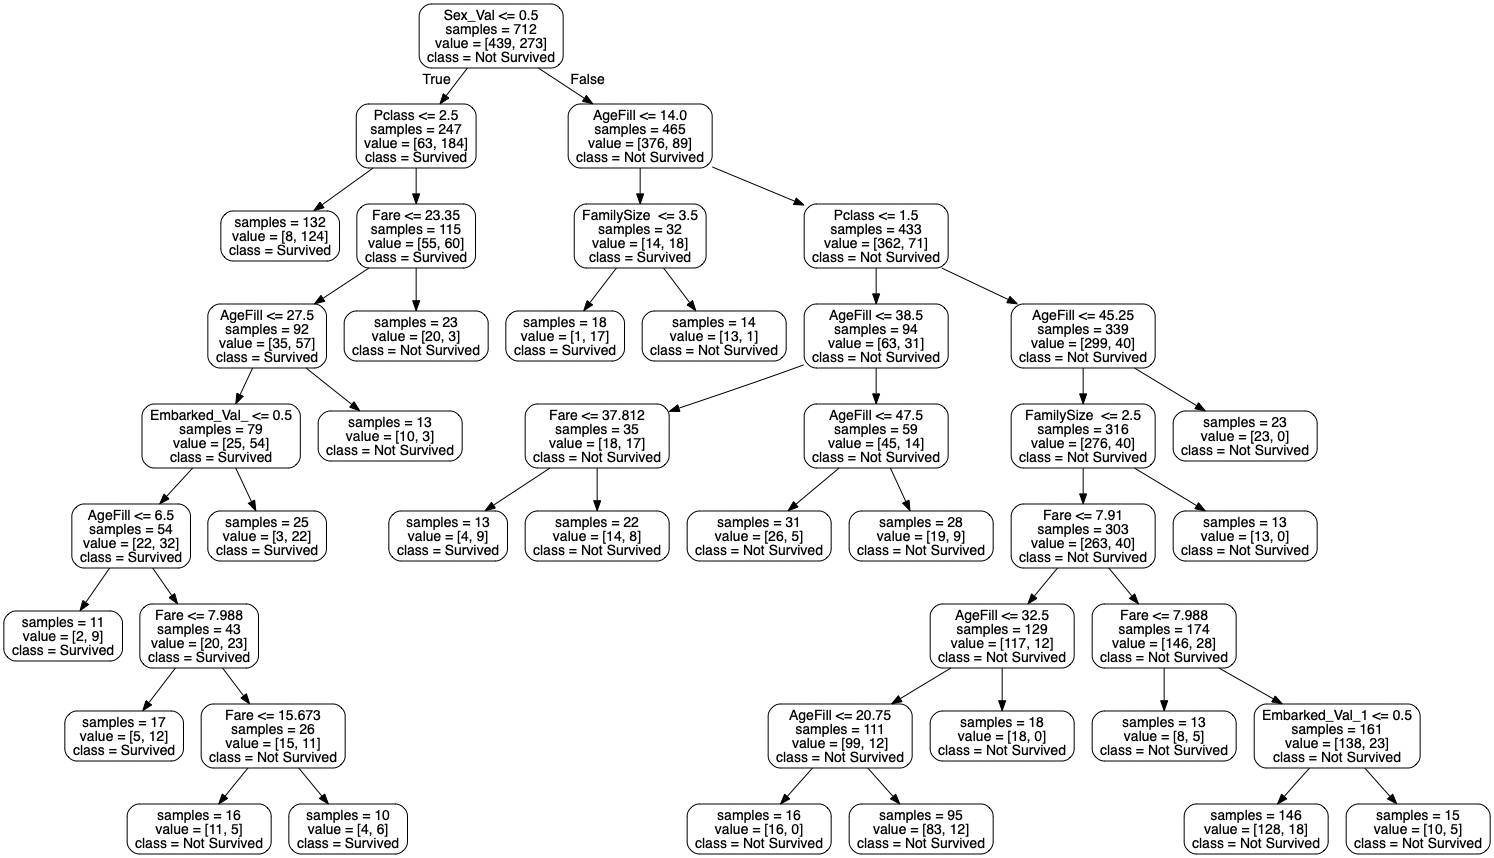

In [534]:
# Export our trained model as a .dot file
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(clf_tree3,
                              out_file=f,
                              max_depth = 8,
                              impurity = False,
                              feature_names = ['Pclass', 'Fare', 'Sex_Val', 'Embarked_Val_0', 'Embarked_Val_1', 'Embarked_Val_', 'AgeFill', 'FamilySize '],
                              class_names = ['Not Survived', 'Survived'],
                              rounded = True
                              )
        
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

# Annotating chart with PIL
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png", height=2000, width=1900)

## Decision Tree Model 4

In [535]:
#the best accuracy is 84%, but the tree is quite unbalanced
clf_tree4 = tree.DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=10, min_samples_split=2, min_samples_leaf=15, random_state=0)
#smote dataset
clf_tree4.fit(trainx, trainy)
ypred_tree4 = clf_tree4.predict(test_x)
summary = classification_report(test_y, ypred_tree4, target_names=['Not Survived', 'Survived'])
print(summary)

              precision    recall  f1-score   support

Not Survived       0.83      0.91      0.87       110
    Survived       0.83      0.71      0.77        69

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



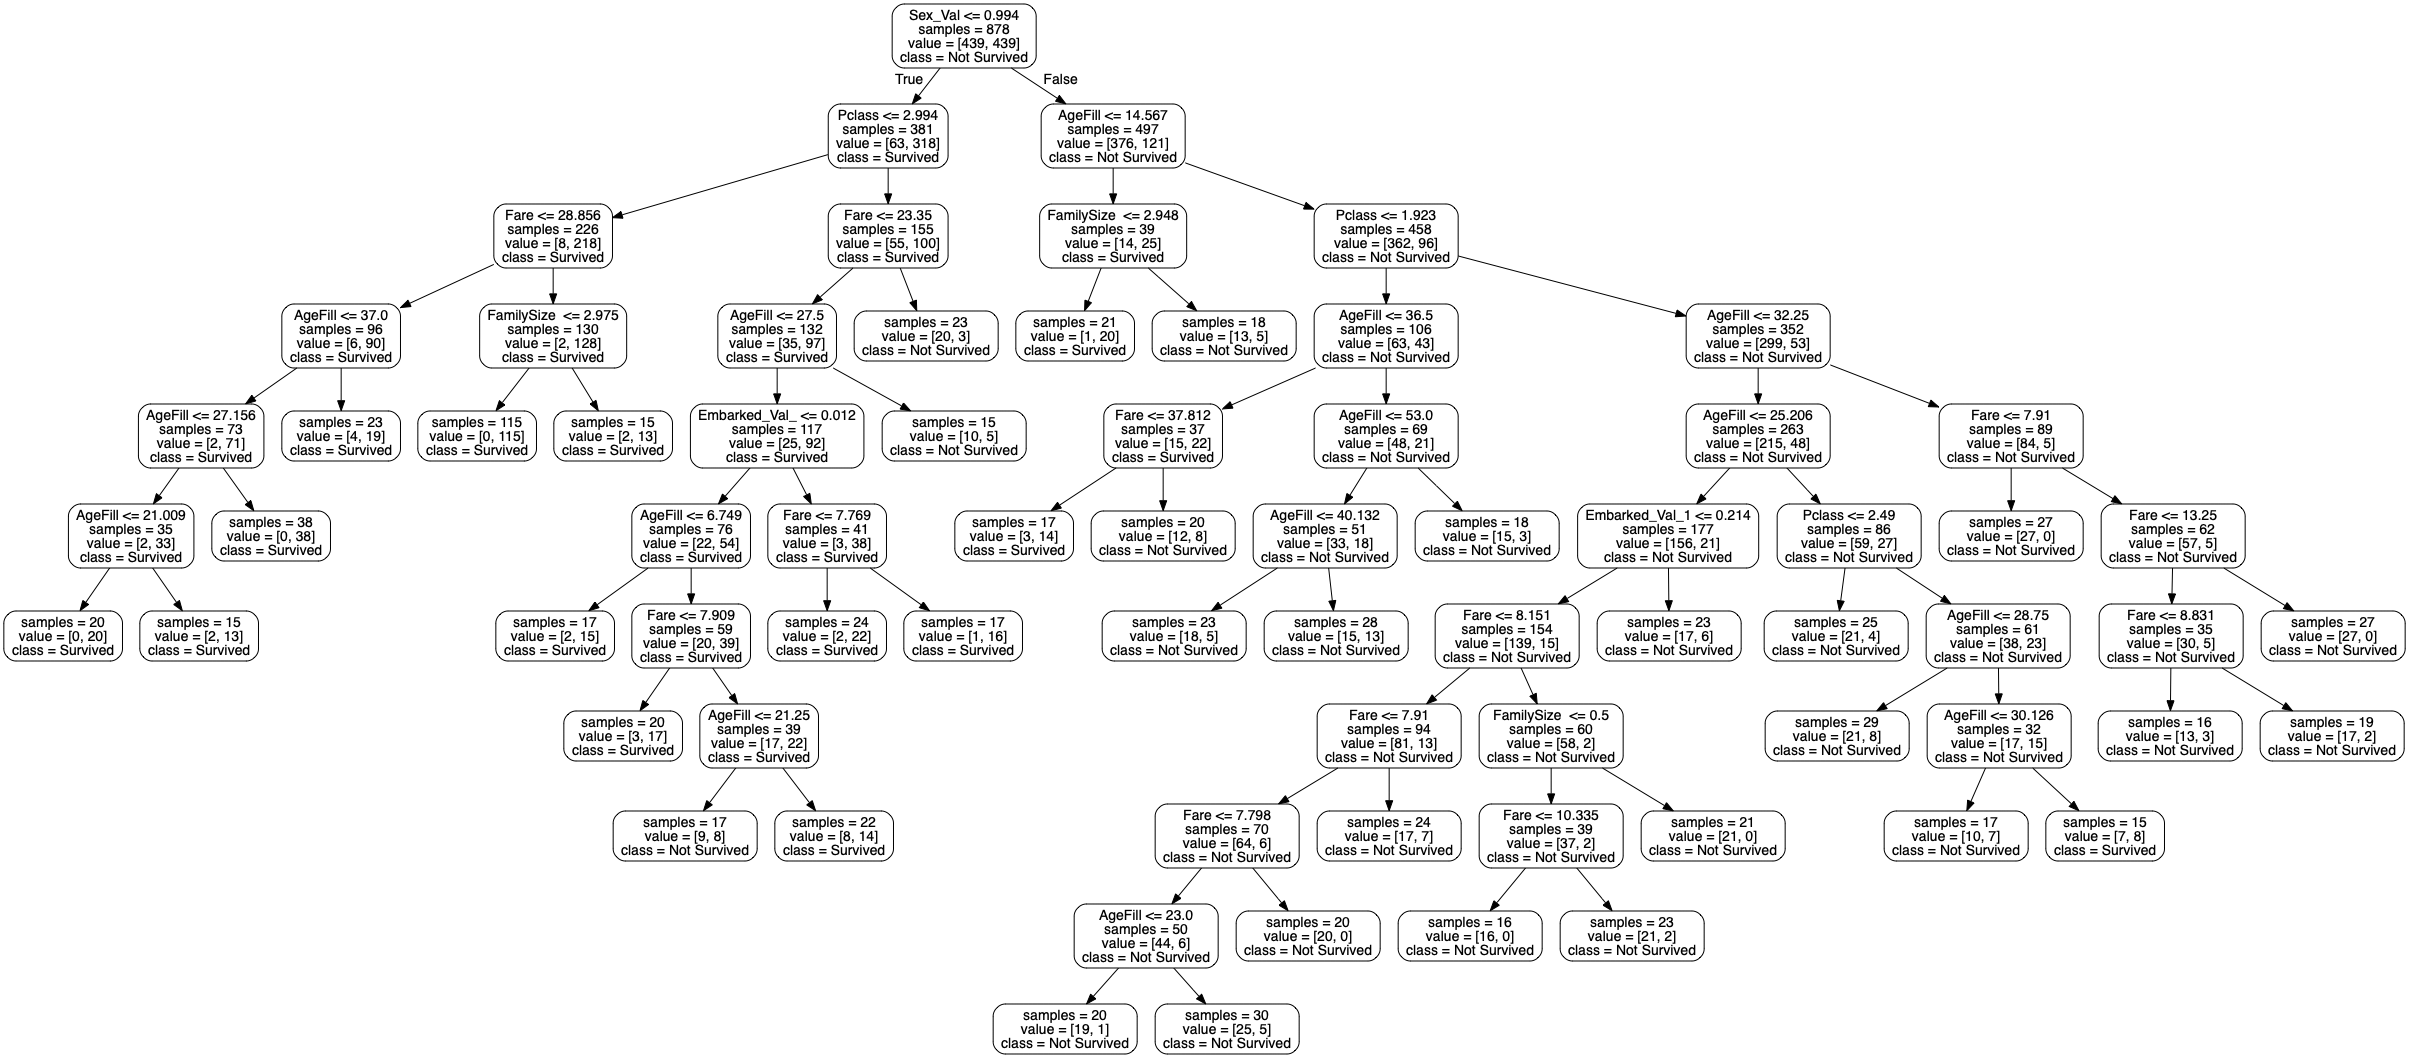

In [536]:
# Export our trained model as a .dot file
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(clf_tree4,
                              out_file=f,
                              max_depth = 10,
                              impurity = False,
                              feature_names = ['Pclass', 'Fare', 'Sex_Val', 'Embarked_Val_0', 'Embarked_Val_1', 'Embarked_Val_', 'AgeFill', 'FamilySize '],
                              class_names = ['Not Survived', 'Survived'],
                              rounded = True
                              )
        
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

# Annotating chart with PIL
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png", height=2000, width=1900)

In [449]:
#gini 
# it doesn't get any better
clf_tree4 = tree.DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=10, min_samples_split=2, min_samples_leaf=15, random_state=0)
clf_tree4.fit(trainx, trainy)
ypred_tree4 = clf_tree4.predict(test_x)
summary = classification_report(test_y, ypred_tree4, target_names=['Not Survived', 'Survived'])
print(summary)


              precision    recall  f1-score   support

Not Survived       0.84      0.93      0.88       110
    Survived       0.86      0.71      0.78        69

    accuracy                           0.84       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.85      0.84      0.84       179



## Decision Tree Model 5

In [450]:
#assign weights to leaves
#min_weight_fraction_leaf = 0.00001 
#accuracy is still 84%
clf_tree5 = tree.DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=6, min_weight_fraction_leaf = 0.00001, min_samples_split=2, min_samples_leaf=15, random_state=0)
clf_tree5.fit(trainx, trainy)
ypred_tree5 = clf_tree5.predict(test_x)
summary = classification_report(test_y, ypred_tree5, target_names=['Not Survived', 'Survived'])
print(summary)


              precision    recall  f1-score   support

Not Survived       0.83      0.91      0.87       110
    Survived       0.83      0.71      0.77        69

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



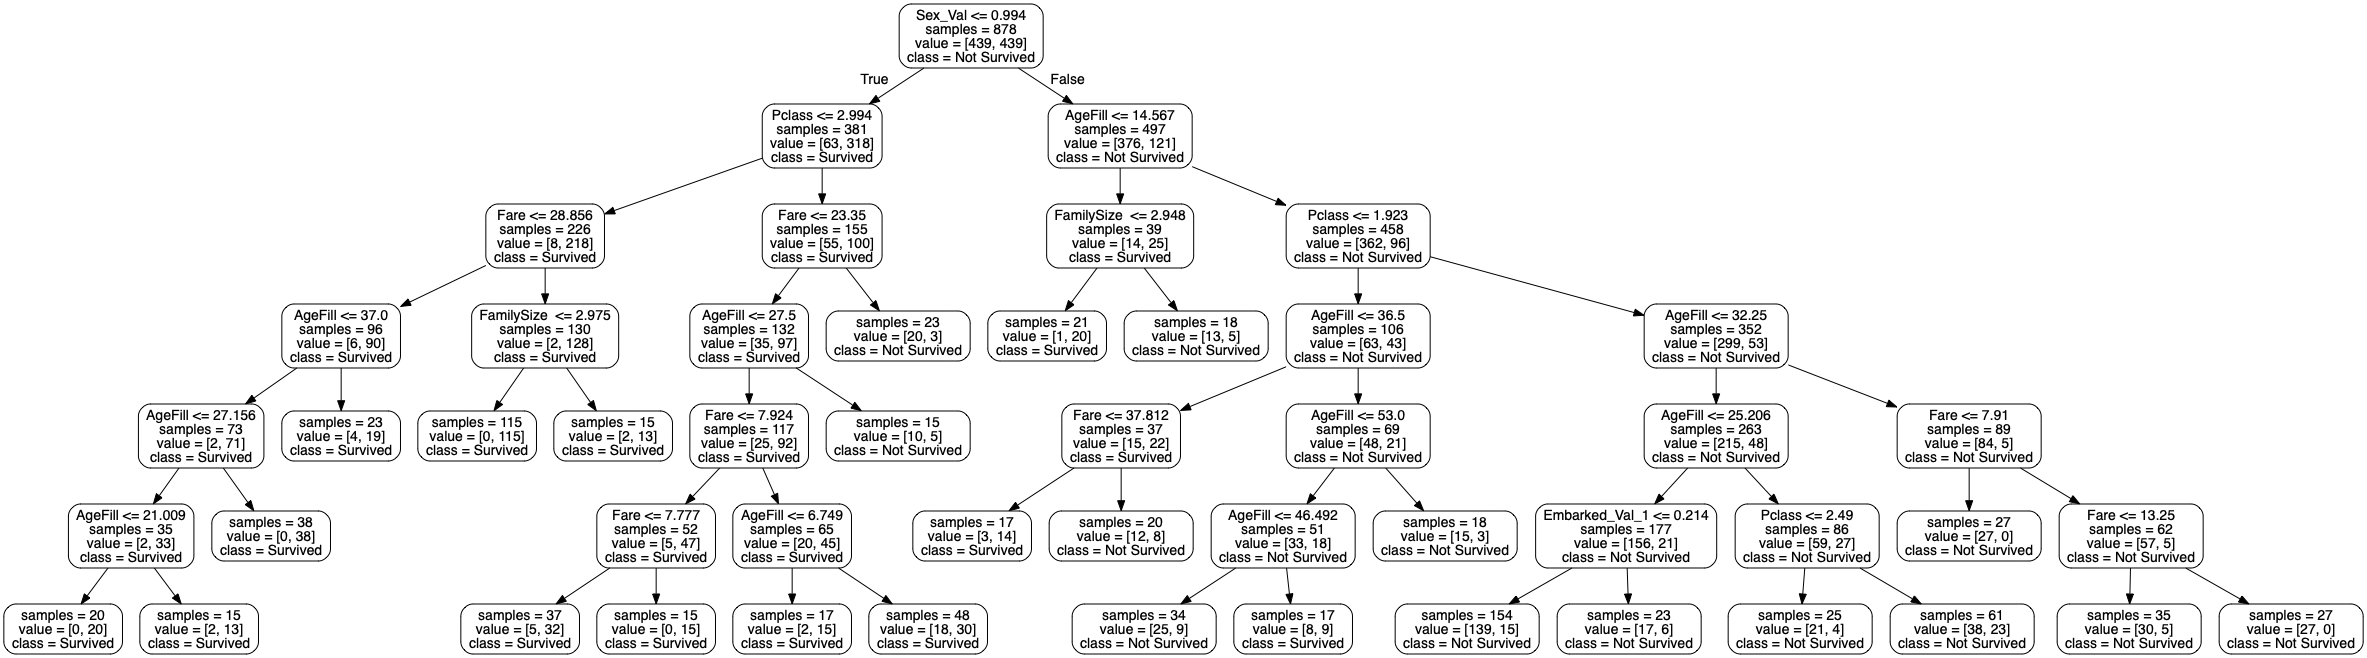

In [537]:
#tree is quite balanced
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(clf_tree5,
                              out_file=f,
                              max_depth = 6,
                              impurity = False,
                              feature_names = ['Pclass', 'Fare', 'Sex_Val', 'Embarked_Val_0', 'Embarked_Val_1', 'Embarked_Val_', 'AgeFill', 'FamilySize '],
                              class_names = ['Not Survived', 'Survived'],
                              rounded = True
                              )
        
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

# Annotating chart with PIL
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png", height=2000, width=1900)

## Decision Tree Model 6

In [225]:
from imblearn.over_sampling import SMOTE
oversampler = SMOTE(random_state=0)
smote_trainx, smote_trainy = oversampler.fit_sample(train_x,train_y)

Using TensorFlow backend.
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [540]:
clf_tree6 = tree.DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=6, min_weight_fraction_leaf = 0.00001, min_samples_split=2, min_samples_leaf=50, random_state=0)
clf_tree6.fit(smote_trainx, smote_trainy)
ypred_tree6 = clf_tree6.predict(smote_trainx)
summary = classification_report(smote_trainy, ypred_tree6, target_names=['Not Survived', 'Survived'])
print(summary)

              precision    recall  f1-score   support

Not Survived       0.73      0.94      0.83       439
    Survived       0.92      0.66      0.77       439

    accuracy                           0.80       878
   macro avg       0.83      0.80      0.80       878
weighted avg       0.83      0.80      0.80       878



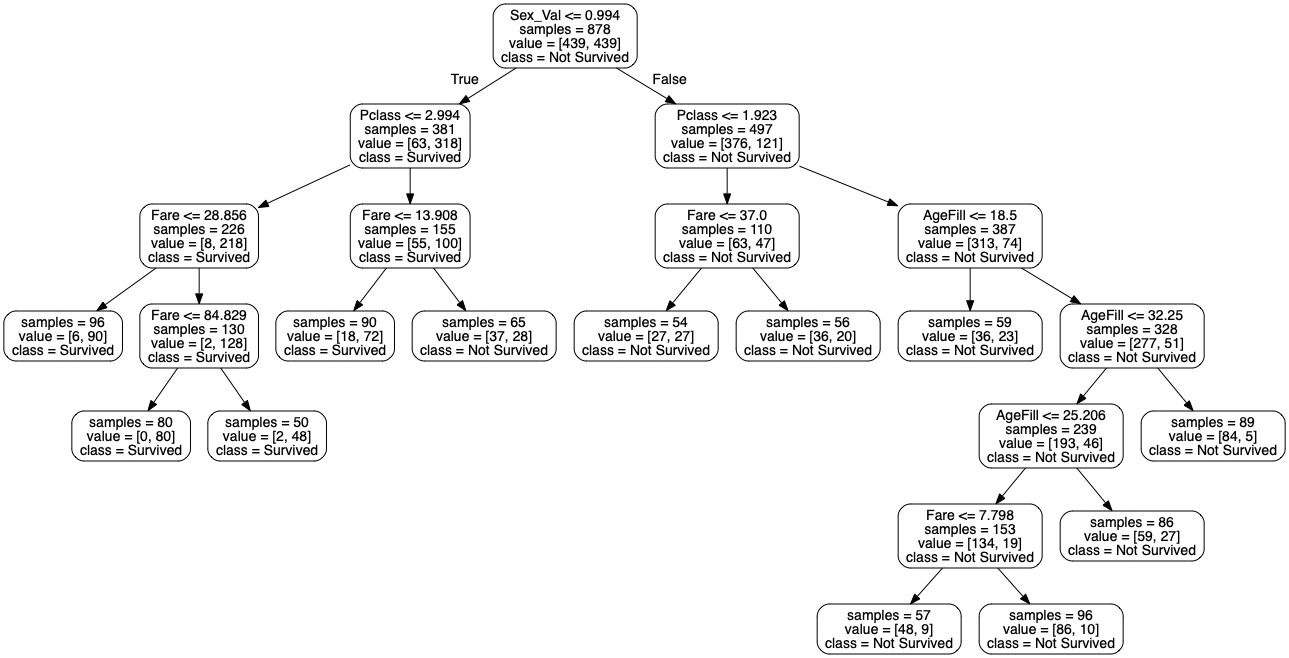

In [541]:
# Export our trained model as a .dot file
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(clf_tree6,
                              out_file=f,
                              max_depth = 6,
                              impurity = False,
                              feature_names = ['Pclass', 'Fare', 'Sex_Val', 'Embarked_Val_0', 'Embarked_Val_1', 'Embarked_Val_', 'AgeFill', 'FamilySize '],
                              class_names = ['Not Survived', 'Survived'],
                              rounded = True
                              )
        
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

# Annotating chart with PIL
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png", height=2000, width=1900)

In [542]:
clf_tree7 = tree.DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=6, min_weight_fraction_leaf = 0.00001, min_samples_split=2, min_samples_leaf=50, random_state=0)
clf_tree7.fit(X_train, Y_train)
ypred_tree7 = clf_tree7.predict(X_test)
summary = classification_report(Y_test, ypred_tree7, target_names=['Not Survived', 'Survived'])
print(summary)

              precision    recall  f1-score   support

Not Survived       0.79      0.92      0.85       106
    Survived       0.85      0.64      0.73        72

    accuracy                           0.81       178
   macro avg       0.82      0.78      0.79       178
weighted avg       0.82      0.81      0.80       178



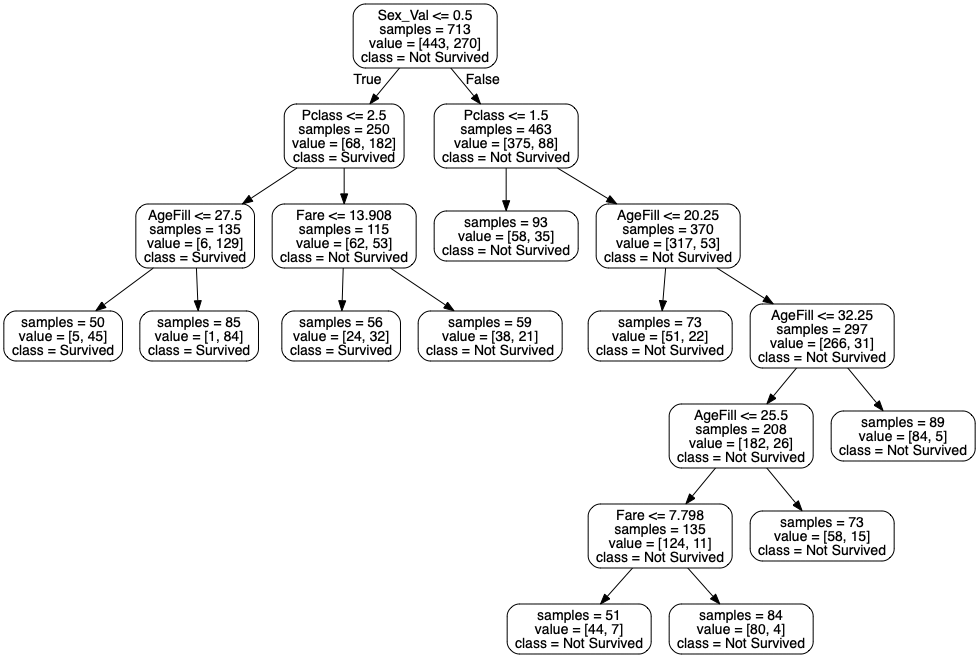

In [543]:
# Export our trained model as a .dot file
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(clf_tree7,
                              out_file=f,
                              max_depth = 6,
                              impurity = False,
                              feature_names = ['Pclass', 'Fare', 'Sex_Val', 'Embarked_Val_0', 'Embarked_Val_1', 'Embarked_Val_', 'AgeFill', 'FamilySize '],
                              class_names = ['Not Survived', 'Survived'],
                              rounded = True
                              )
        
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

# Annotating chart with PIL
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png", height=2000, width=1900)

In [544]:
oversampler=SMOTE(random_state=0)
trainx1, trainy1 = oversampler.fit_sample(X_train, Y_train)
testx1, testy1 = oversampler.fit_sample(X_test, Y_test)

In [545]:
clf_tree8 = tree.DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=6, min_weight_fraction_leaf = 0.00001, min_samples_split=2, min_samples_leaf=50, random_state=0)
clf_tree8.fit(trainx1, trainy1)
ypred_tree8 = clf_tree8.predict(testx1)
summary = classification_report(testy1, ypred_tree8, target_names=['Not Survived', 'Survived'])
print(summary)

              precision    recall  f1-score   support

Not Survived       0.74      0.86      0.79       106
    Survived       0.83      0.70      0.76       106

    accuracy                           0.78       212
   macro avg       0.79      0.78      0.78       212
weighted avg       0.79      0.78      0.78       212



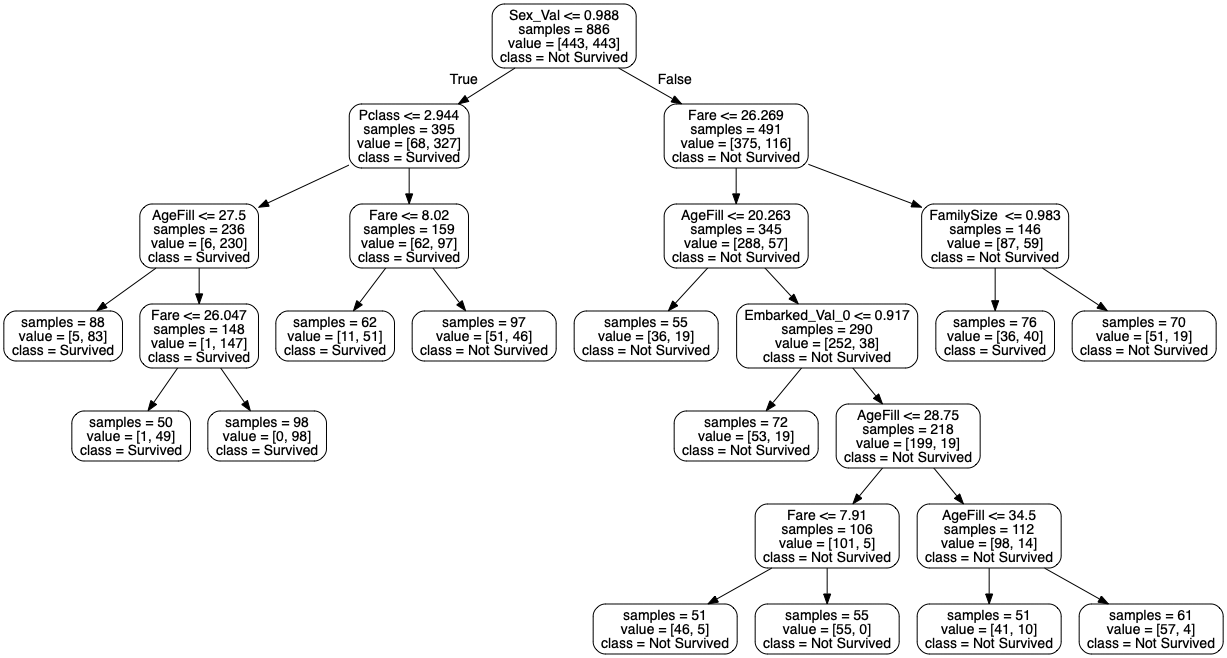

In [546]:
# Export our trained model as a .dot file
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(clf_tree8,
                              out_file=f,
                              max_depth = 6,
                              impurity = False,
                              feature_names = ['Pclass', 'Fare', 'Sex_Val', 'Embarked_Val_0', 'Embarked_Val_1', 'Embarked_Val_', 'AgeFill', 'FamilySize '],
                              class_names = ['Not Survived', 'Survived'],
                              rounded = True
                              )
        
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

# Annotating chart with PIL
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png", height=2000, width=1900)

## Decision Tree Regressor

In [547]:
#CART - regressor
from sklearn import tree
clf_regressor = tree.DecisionTreeRegressor(max_depth=6, min_samples_leaf=10)
clf_regressor.fit(trainx, trainy)
ypred_regressor =clf_regressor.predict(test_x)

In [548]:
accuracy = metrics.accuracy_score(test_y, ypred_tree)
print("-------------------------")
print("Mean accuracy with test data:", accuracy)


summary = classification_report(test_y, ypred_tree, target_names=['Not Survived', 'Survived'])
print(summary)

-------------------------
Mean accuracy with test data: 0.8268156424581006
              precision    recall  f1-score   support

Not Survived       0.85      0.87      0.86       110
    Survived       0.79      0.75      0.77        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



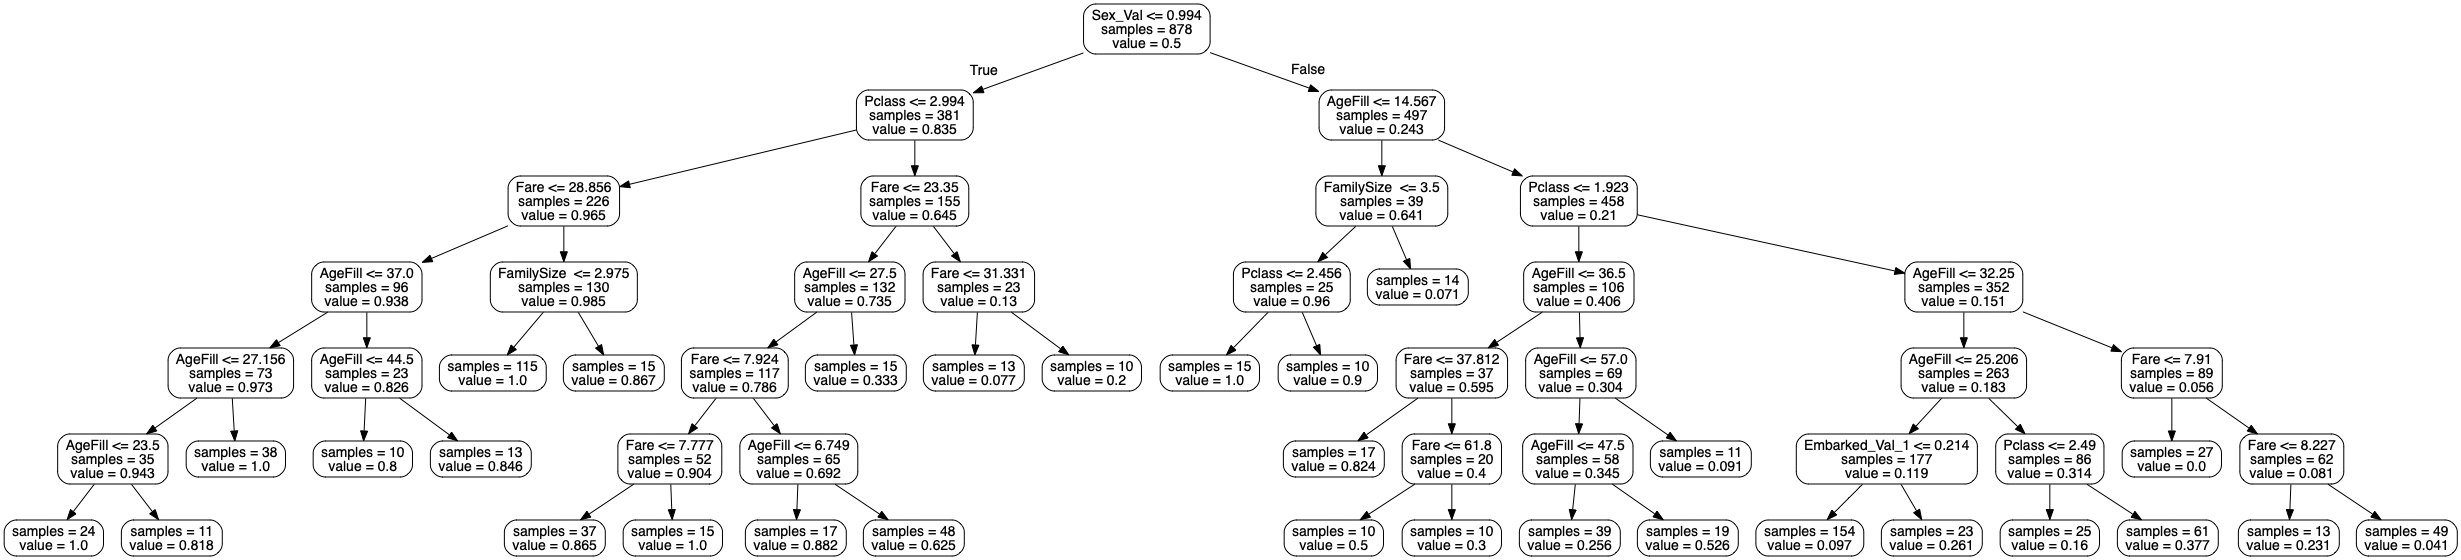

In [549]:
# Export our trained model as a .dot file
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(clf_regressor,
                              out_file=f,
                              max_depth = 6,
                              impurity = False,
                              feature_names = ['Pclass', 'Fare', 'Sex_Val', 'Embarked_Val_0', 'Embarked_Val_1', 'Embarked_Val_', 'AgeFill', 'FamilySize '],
                              class_names = ['Not Survived', 'Survived'],
                              rounded = True
                              )
        
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

# Annotating chart with PIL
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png", height=2000, width=1900)

## Random Forest

In [551]:
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=6, min_samples_split=2, min_samples_leaf=10, random_state=0)
rf.fit(smote_trainx, smote_trainy)  
ypred_rf = rf.predict(test_x)
print("Accuracy score: {}".format(accuracy_score(test_y, ypred_rf )))
print("="*80)
print(classification_report(test_y, ypred_rf))

Accuracy score: 0.8100558659217877
              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85       110
         1.0       0.78      0.71      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



## Gradient Boosted Classifier

In [524]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, max_depth=6, min_samples_split=2, min_samples_leaf=10, random_state=0)
# Fit the model to our SMOTEd train and target
gb.fit(smote_trainx, smote_trainy)
#gb.fit(X_train, Y_train)
# Get our predictions
gb_predictions = gb.predict(test_x)
#gb_predictions = gb.predict(X_test)
print("Predictions have finished")
#print(accuracy_score(Y_test, gb_predictions))
print(accuracy_score(test_y, gb_predictions ))
print(classification_report(test_y, ypred_rf))
#print(classification_report(Y_test, gb_predictions))

Predictions have finished
0.8659217877094972
              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85       110
         1.0       0.78      0.71      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



In [525]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, max_depth=6, min_samples_split=2, min_samples_leaf=10, random_state=0)
# Fit the model to our SMOTEd train and target
#gb.fit(smote_trainx, smote_trainy)
gb.fit(X_train, Y_train)
# Get our predictions
#gb_predictions = gb.predict(test_x)
gb_predictions = gb.predict(X_test)
print("Predictions have finished")
print(accuracy_score(Y_test, gb_predictions))
#print(accuracy_score(test_y, gb_predictions ))
#print(classification_report(test_y, ypred_rf))
print(classification_report(Y_test, gb_predictions))

Predictions have finished
0.8426966292134831
              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87       106
         1.0       0.82      0.78      0.80        72

    accuracy                           0.84       178
   macro avg       0.84      0.83      0.84       178
weighted avg       0.84      0.84      0.84       178



## Evaluating Feature Importance for Logistic Regression, SVM, Decision Trees

In [254]:
#feature importance
for name, score in zip(df_final.columns.values,
                      clf_tree.feature_importances_):
    print(name, score)
#the third feature is the most important: sex_val

Pclass 0.2208915945573733
Fare 0.06305659325822698
Sex_Val 0.5741812592612728
Embarked_Val_0 0.0
Embarked_Val_1 0.0
Embarked_Val_2 0.0
AgeFill 0.06403054435337671
FamilySize 0.07784000856975004


In [554]:
# Scatter plot 
trace = go.Scatter(
    y = clf_lr.coef_[0],
    x = df_final.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = clf_lr.coef_,
        colorscale='Portland',
        showscale=True
    ),
    text = df_final.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Logistic Regression Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [293]:
# Scatter plot 
trace = go.Scatter(
    y = lin_clf.coef_[0],
    x = df_final.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = lin_clf.coef_,
        colorscale='Portland',
        showscale=True
    ),
    text = df_final.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Linear SVC Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [263]:
clf_tree.feature_importances_

array([0.22089159, 0.06305659, 0.57418126, 0.        , 0.        ,
       0.        , 0.06403054, 0.07784001])

In [529]:
# Scatter plot 
trace = go.Scatter(
    y = clf_tree4.feature_importances_,
    x = df_final.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = clf_tree4.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = df_final.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Decision Tree Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [555]:
#clf_regressor 
# Scatter plot 
trace = go.Scatter(
    y = clf_regressor.feature_importances_,
    x = df_final.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = clf_tree4.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = df_final.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Decision Tree Regressor Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [531]:
# Scatter plot 
trace = go.Scatter(
    y = rf.feature_importances_,
    x = df_final.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = df_final.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [530]:
# Scatter plot 
trace = go.Scatter(
    y = gb.feature_importances_,
    x = df_final.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = gb.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = df_final.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Model Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter')